In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

directory = 'deepseekcoder6.7/'

FILE = "evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct"
model = "deepseek-coder-6-7b-instruct"
file_names = []
models = []
for quant in ["4bit", "8bit", ""]:
    file_names.append(FILE + quant)
    models.append(model + quant)
print(file_names)
print(models)

['evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct4bit', 'evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct8bit', 'evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct']
['deepseek-coder-6-7b-instruct4bit', 'deepseek-coder-6-7b-instruct8bit', 'deepseek-coder-6-7b-instruct']


In [2]:
metrics = []
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Extract the "pass@1" value
            try:
                pass1_value = data.get('humanevalexplainsynthesize-python', {}).get('pass@1')
                if pass1_value is not None:
                    print(f"{file_name}: pass@1 = {pass1_value}")
                    metrics.append(pass1_value)
                else:
                    print(f"{file_name}: 'pass@1' key not found.")
            except json.JSONDecodeError:
                print(f"{file_name}: Error decoding JSON.")
    else:
        print(f"{file_name}: File not found.")
        
print(metrics)

evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct4bit: pass@1 = 0.5670731707317073
evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct8bit: pass@1 = 0.5975609756097561
evaluation_humanevalexplainpython_deepseek-coder-6-7b-instruct: pass@1 = 0.6280487804878049
[0.5670731707317073, 0.5975609756097561, 0.6280487804878049]


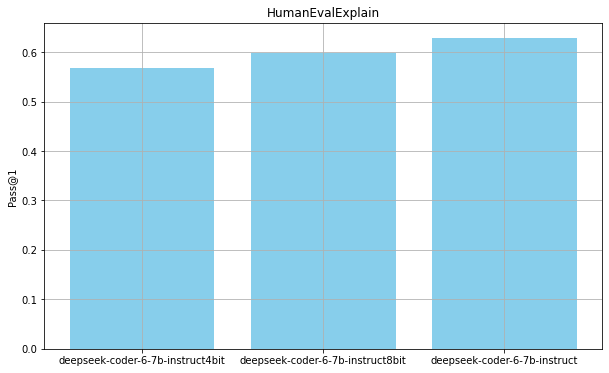

In [3]:
xticks_positions = [1.5, 2.5, 3.5]

plt.figure(figsize=(10, 6))
plt.bar(models, metrics, color=['skyblue'])
plt.title('HumanEvalExplain')
plt.xlabel('')
plt.ylabel('Pass@1')
plt.grid(True)
plt.savefig("figures/deepseekcoder6-7_quantization")
plt.show()